### Read-in downloaded data

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
def load_data_file_cold(file, stats):
    print('loading file:' + file)
    training_df = pd.read_csv(
        "csv/" + file,
        skiprows=[0],
        names=["viewer","broadcaster","viewer_age","viewer_gender","viewer_longitude","viewer_latitude","viewer_lang","viewer_country","broadcaster_age","broadcaster_gender","broadcaster_longitude","broadcaster_latitude","broadcaster_lang","broadcaster_country","duration", "viewer_network", "broadcaster_network", "count"], dtype={
            'viewer': np.unicode,
            'broadcaster': np.unicode,
            'viewer_age': np.single,
            'viewer_gender': np.unicode,
            'viewer_longitude': np.single,
            'viewer_latitude': np.single,
            'viewer_lang': np.unicode,
            'viewer_country': np.unicode,
            'broadcaster_age': np.single,
            'broadcaster_longitude': np.single,
            'broadcaster_latitude': np.single,
            'broadcaster_lang': np.unicode,
            'broadcaster_country': np.unicode,
            'viewer_network': np.unicode,
            'broadcaster_network': np.unicode,
            'count': np.int
        })

    values = {
        'viewer': 'unknown',
        'broadcaster': 'unknown',
        'viewer_age': 30,
        'viewer_gender': 'unknown',
        'viewer_longitude': 0,
        'viewer_latitude': 0,
        'viewer_lang': 'unknown',
        'viewer_country': 'unknown',
        'broadcaster_age': 30,
        'broadcaster_longitude': 0,
        'broadcaster_latitude': 0,
        'broadcaster_lang': 'unknown',
        'broadcaster_country': 'unknown',
        'duration': 0,
        'viewer_network': 'unknown',
        'broadcaster_network': 'unknown',
        'count': 0
    }
    training_df.fillna(value=values, inplace=True)
    print(training_df.head(10))
    print(training_df.iloc[-10:])
#     stats.send_stats('data-size', len(training_df.index))
    sampled_df = training_df.sample(frac=0.1)
    return sampled_df


def load_training_data_cold(file, stats):
    ratings_df = load_data_file_cold(file, stats)
    print('creating data set')
    training_ds = (
        tf.data.Dataset.from_tensor_slices(
            ({
                "viewer": tf.cast(
                    ratings_df['viewer'].values,
                    tf.string),
                "viewer_gender": tf.cast(
                    ratings_df['viewer_gender'].values,
                    tf.string),
                "viewer_lang": tf.cast(
                    ratings_df['viewer_lang'].values,
                    tf.string),
                "viewer_country": tf.cast(
                    ratings_df['viewer_country'].values,
                    tf.string),
                "viewer_age": tf.cast(
                    ratings_df['viewer_age'].values,
                    tf.int32),
                "viewer_longitude": tf.cast(
                    ratings_df['viewer_longitude'].values,
                    tf.float16),
                "viewer_latitude": tf.cast(
                    ratings_df['viewer_latitude'].values,
                    tf.float16),
                "broadcaster": tf.cast(
                    ratings_df['broadcaster'].values,
                    tf.string),
                "viewer_network": tf.cast(
                    ratings_df['viewer_network'].values,
                    tf.string),
                "broadcaster_network": tf.cast(
                    ratings_df['broadcaster_network'].values,
                    tf.string),
            })))

    return training_ds

In [4]:
def prepare_training_data_cold(train_ds):
    print('prepare_training_data')
    training_ds = train_ds.cache().map(lambda x: {
        "broadcaster": x["broadcaster"],
        "viewer": x["viewer"],
        "viewer_gender": x["viewer_gender"],
        "viewer_lang": x["viewer_lang"],
        "viewer_country": x["viewer_country"],
        "viewer_age": x["viewer_age"],
        "viewer_longitude": x["viewer_longitude"],
        "viewer_latitude": x["viewer_latitude"],
        "viewer_network": x["viewer_network"],
        "broadcaster_network": x["broadcaster_network"],
    }, num_parallel_calls=tf.data.AUTOTUNE,
       deterministic=False)

    print('done prepare_training_data')
    return training_ds

def get_broadcaster_data_set(train_ds):
    broadcasters = train_ds.cache().map(lambda x: x["broadcaster"], num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)
    broadcasters_ds = tf.data.Dataset.from_tensor_slices(
        np.unique(list(broadcasters.as_numpy_iterator())))
    return broadcasters_ds

def get_list(training_data, key):
    return training_data.batch(1_000_000).map(lambda x: x[key], num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)

def get_unique_list(data):
    return np.unique(np.concatenate(list(data)))

In [5]:
training_dataset = load_training_data_cold(file="0e9cd673-8e06-4810-b370-8b9930ee312a.csv", stats="")

loading file:0e9cd673-8e06-4810-b370-8b9930ee312a.csv
             viewer       broadcaster  viewer_age viewer_gender  \
0     pof:333765857     pof:306180728        30.0          male   
1  meetme:277560515  meetme:234128276        40.0        female   
2     pof:290015550  meetme:318374085        25.0          male   
3   meetme:57803631  meetme:272213699        24.0          male   
4  meetme:177581880   skout:178541757        39.0          male   
5  meetme:250326980  meetme:220423595        38.0          male   
6  meetme:317803066   skout:162535474        25.0        female   
7  meetme:318423667   skout:162535474        25.0        female   
8   skout:179246014     pof:322295296        33.0          male   
9   skout:184177791   skout:182825538        27.0        female   

   viewer_longitude  viewer_latitude viewer_lang viewer_country  \
0        -96.699997        32.900002          en             US   
1        151.207108       -33.867100          en             US   
2      

In [6]:
train = prepare_training_data_cold(training_dataset)

prepare_training_data
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
done prepare_training_data


In [7]:
broadcasters_data_set = get_broadcaster_data_set(training_dataset)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [8]:
def get_list(training_data, key):
    return training_data.batch(1_000_000).map(lambda x: x[key], num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)


def get_unique_list(data):
    return np.unique(np.concatenate(list(data)))

In [9]:
user_genders = get_list(train, 'viewer_gender')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [10]:
user_langs = get_list(train, 'viewer_lang')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [11]:
user_countries = get_list(train, 'viewer_country')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [12]:
viewer_age = get_list(train, 'viewer_age')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [13]:
user_networks = get_list(train, 'viewer_network')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [14]:
unique_user_genders = get_unique_list(user_genders)

In [15]:
len(unique_user_genders)

2

In [16]:
unique_user_langs = get_unique_list(user_langs)

In [17]:
len(unique_user_langs)

49

In [18]:
unique_user_countries = get_unique_list(user_countries)

In [19]:
len(unique_user_countries)

161

In [20]:
unique_user_networks = get_unique_list(user_networks)

In [21]:
len(unique_user_networks)

4

In [22]:
#--- UserModel

In [23]:
gender_lookup = tf.keras.layers.experimental.preprocessing.StringLookup()
gender_lookup.adapt(train.map(lambda x: x["viewer_gender"]))

embedding1 = tf.keras.layers.Embedding(gender_lookup.vocabulary_size() + 1,  4)
gender_embedding = tf.keras.Sequential([gender_lookup, embedding1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [24]:
gender_embedding([b"female"])

Consider rewriting this model with the Functional API.


<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.01838673, -0.01822972, -0.03077537,  0.04356309]],
      dtype=float32)>

In [25]:
lang_lookup = tf.keras.layers.experimental.preprocessing.StringLookup()
lang_lookup.adapt(train.map(lambda x: x["viewer_lang"]))

embedding2 = tf.keras.layers.Embedding(lang_lookup.vocabulary_size() + 1,  4)
lang_embedding = tf.keras.Sequential([lang_lookup, embedding2])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [26]:
lang_embedding([b"en"])

Consider rewriting this model with the Functional API.


<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-1.0379218e-02, -5.5123121e-05,  2.6198972e-02, -2.1932591e-02]],
      dtype=float32)>

In [27]:
country_lookup = tf.keras.layers.experimental.preprocessing.StringLookup()
country_lookup.adapt(train.map(lambda x: x["viewer_country"]))

embedding3 = tf.keras.layers.Embedding(lang_lookup.vocabulary_size() + 1,  11)
country_embedding = tf.keras.Sequential([country_lookup, embedding3])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [28]:
country_embedding(["US"])

Consider rewriting this model with the Functional API.


<tf.Tensor: shape=(1, 11), dtype=float32, numpy=
array([[ 0.03155278, -0.03284504, -0.00276942, -0.00912889,  0.03885085,
         0.03181878,  0.04915068,  0.00472736,  0.03455583,  0.04603994,
        -0.00748615]], dtype=float32)>

In [29]:
network_lookup = tf.keras.layers.experimental.preprocessing.StringLookup()
network_lookup.adapt(train.map(lambda x: x["viewer_network"]))

embedding4 = tf.keras.layers.Embedding(lang_lookup.vocabulary_size() + 1,  11)
network_embedding = tf.keras.Sequential([network_lookup, embedding4])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [30]:
network_embedding([b"meetme"])

Consider rewriting this model with the Functional API.


<tf.Tensor: shape=(1, 11), dtype=float32, numpy=
array([[ 0.03065303, -0.01192548,  0.04964919, -0.01413709, -0.02726364,
        -0.00334866, -0.02920326, -0.03126774, -0.01362882, -0.04953181,
         0.00876001]], dtype=float32)>

In [31]:
normalized_age = tf.keras.layers.experimental.preprocessing.Normalization(
    axis=None
)
normalized_age.adapt(train.map(lambda x: x['viewer_age']).batch(1024))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

In [32]:
normalized_age([18, 25, 35, 40, 50, 65])

<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
array([[-1.6634854 ],
       [-0.941834  ],
       [ 0.08909662],
       [ 0.6045619 ],
       [ 1.6354926 ],
       [ 3.1818883 ]], dtype=float32)>

### Keras Implementation

In [33]:
gender_embedding

In [34]:
lang_embedding

In [35]:
country_embedding 

In [36]:
network_embedding

In [48]:
## inputs
input_gender = tf.keras.Input(shape=(None,), name='input_gender')
input_lang = tf.keras.Input(shape=(None, ), name='input_lang')
input_country = tf.keras.Input(shape=(None, ), name='input_country')
input_network = tf.keras.Input(shape=(None, ), name='input_network')

input_broadcaster = tf.keras.Input(shape=(None, ), name='input_broadcaster')

## layers
EMBEDDING_DIMS = 32
viewer_gender_embedding = tf.keras.layers.Embedding(input_dim=3, output_dim=EMBEDDING_DIMS, mask_zero=True, name="viewer_gender_embedding")
viewer_lang_embedding = tf.keras.layers.Embedding(input_dim=54, output_dim=EMBEDDING_DIMS, mask_zero=True, name="viewer_lang_embedding")
viewer_country_embedding = tf.keras.layers.Embedding(input_dim=160, output_dim=EMBEDDING_DIMS, mask_zero=True, name="viewer_country_embedding")
viewer_network_embedding = tf.keras.layers.Embedding(input_dim=4, output_dim=EMBEDDING_DIMS, mask_zero=True, name="viewer_network_embedding")

broadcaster_embedding = tf.keras.layers.Embedding(input_dim=69695, output_dim=32, mask_zero=True, name="broadcaster_embedding")

#--- features
viewer_gender_feature = viewer_gender_embedding(input_gender)
viewer_lang_feature = viewer_lang_embedding(input_lang)
viewer_country_feature = viewer_country_embedding(input_country)
viewer_network_feature = viewer_network_embedding(input_network)

broadcaster_feature = broadcaster_embedding(input_broadcaster)

In [49]:
concat_inputs = tf.keras.layers.Concatenate(axis=1)([viewer_gender_feature,
                                                     viewer_lang_feature,
                                                     viewer_country_feature,  
                                                     viewer_network_feature, 
                                                     broadcaster_feature])

In [50]:
model = tf.keras.Sequential([input_gender, 
                             input_lang, 
                             input_country, 
                             input_network,
                             input_broadcaster])

In [51]:
# Dense Layers
dense_1 = tf.keras.layers.Dense(units=64, name='dense_1')
dense_1_features = dense_1(concat_inputs)
dense_1_relu = tf.keras.layers.ReLU(name='dense_1_relu')(dense_1_features)
dense_1_batch_norm = tf.keras.layers.BatchNormalization(name='dense_1_batch_norm')(dense_1_relu)

dense_output = tf.keras.layers.Dense(32, activation=tf.nn.softmax, name='dense_output')
outputs = dense_output(dense_1_batch_norm)

In [52]:
#Optimizer
optimiser = tf.keras.optimizers.Adam(learning_rate=0.1)

In [53]:
#--- prep model
model = tf.keras.models.Model(
    inputs=[input_gender, input_lang, input_country, input_network, input_broadcaster],
    outputs=[outputs]
)

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_lang
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_country
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_network
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_broadcaster


In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_gender (InputLayer)       [(None, None)]       0                                            
__________________________________________________________________________________________________
input_lang (InputLayer)         multiple             0                                            
__________________________________________________________________________________________________
input_country (InputLayer)      multiple             0                                            
__________________________________________________________________________________________________
input_network (InputLayer)      multiple             0                                            
______________________________________________________________________________________________

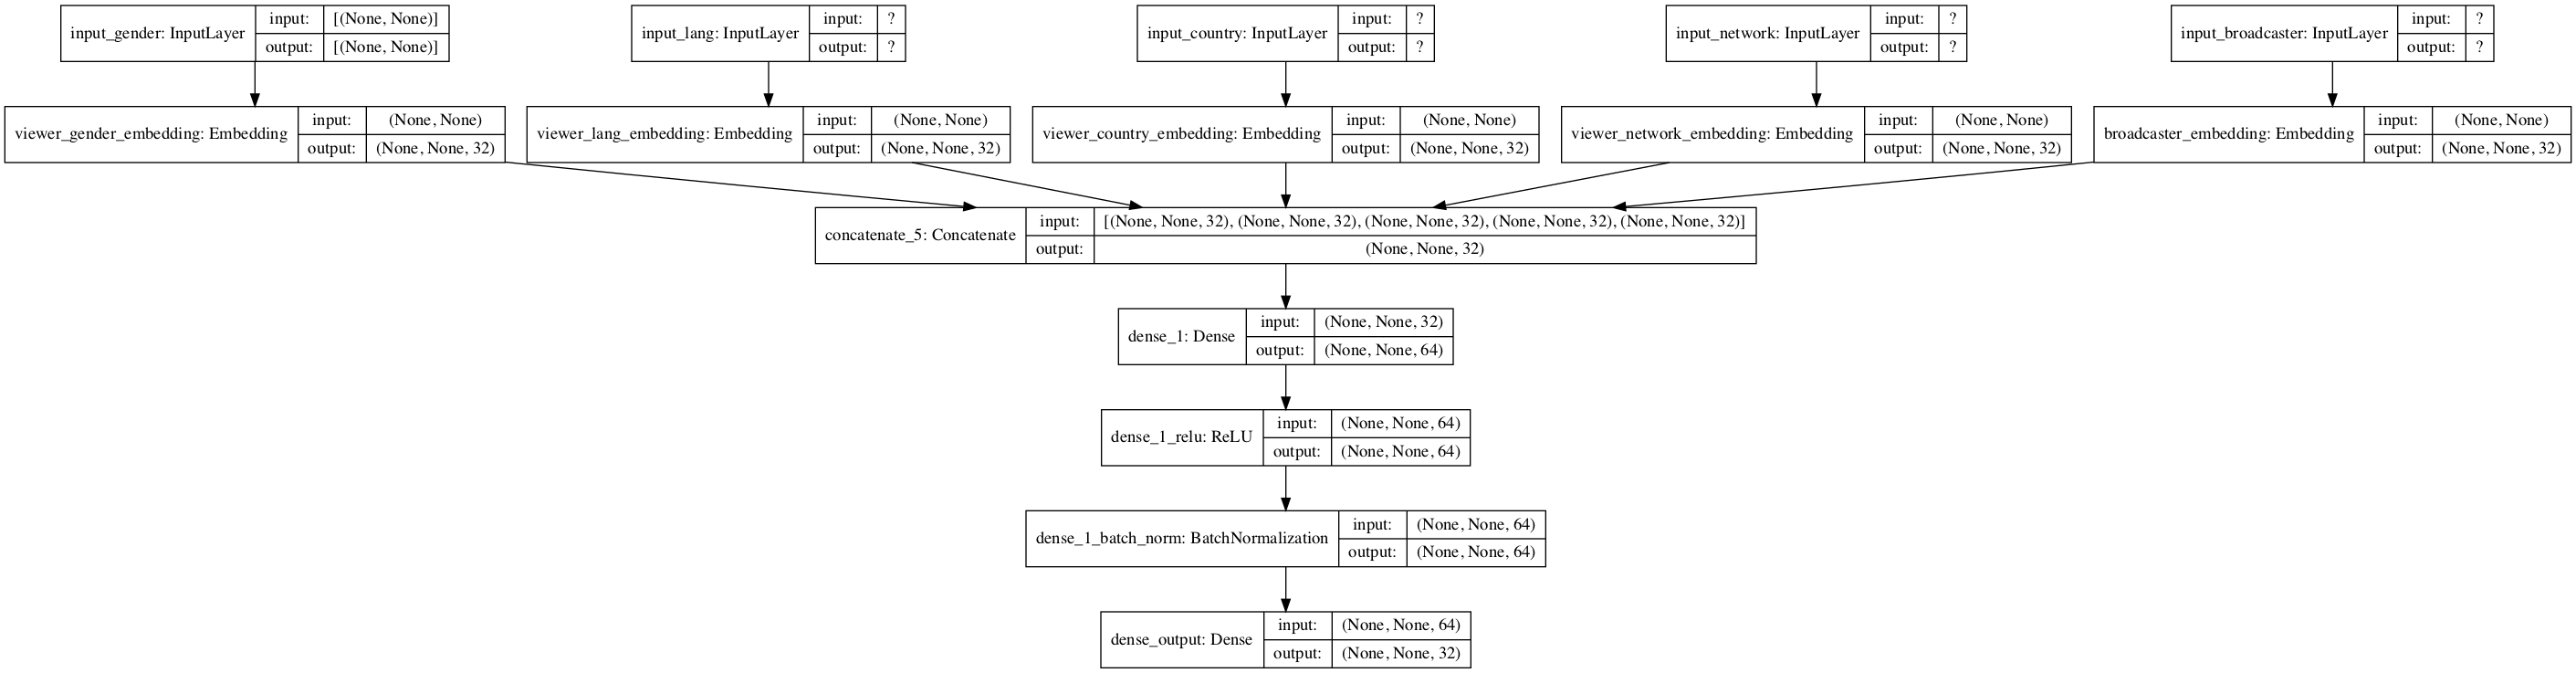

In [55]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=96)

In [192]:
# Using embeddings for categorical features
modifier_type_embedding_in=[]
modifier_type_embedding_out=[]

# sample categorical features
categorical_features = ['modifier_type']

modifier_input_ = Input(shape=(None,), name='modifier_type_in')
# Let's assume 10 unique type of modifiers and let's have embedding dimension as 6
modifier_output_ = Embedding(input_dim=10, output_dim=6, name='modifier_type')(modifier_input_)

modifier_type_embedding_in.append(modifier_input_)
modifier_type_embedding_out.append(modifier_output_)

# sample continuous features
statistics = ['duration']
statistics_inputs =[Input(shape=(None, len(statistics),), name='statistics')] # Input(shape=(1,))

# sample continuous features
abilities = ['buyback_cost', 'cooldown', 'number_of_deaths', 'ability', 'teleport', 'team', 'level', 'max_mana', 'intelligence']
abilities_inputs=[Input(shape=(len(abilities),), name='abilities')] # Input(shape=(9,))

concat = concatenate(modifier_type_embedding_out + statistics_inputs)
FC_relu = Dense(128, activation='relu', name='fc_relu_1')(concat)
FC_relu = Dense(128, activation='relu', name='fc_relu_2')(FC_relu)
max_pool = GlobalMaxPooling1D()(FC_relu)

model = concatenate(abilities_inputs + [max_pool])
model = Dense(64, activation='relu', name='fc_relu_3')(model)
model_out = Dense(1, activation='sigmoid', name='fc_sigmoid')(model)

model_in = abilities_inputs + modifier_type_embedding_in + statistics_inputs
model = Model(inputs=model_in, outputs=model_out)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=2e-05, decay=1e-3), metrics=['accuracy'])


NameError: name 'Input' is not defined

In [30]:
unique_broadcasters = get_unique_list(broadcaster_ids)

In [33]:
len(unique_broadcasters)

69009

In [34]:
broadcaster_embedding_dimension = 32

In [35]:
broadcaster_model = BroadcasterModel(unique_broadcasters, broadcaster_embedding_dimension)

In [36]:
metrics = tfrs.metrics.FactorizedTopK(candidates=broadcasters_data_set.batch(128).map(broadcaster_model))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [37]:
task = tfrs.tasks.Retrieval(
    metrics=metrics
)

In [38]:
class TwoTowers(tf.keras.Model):

    def __init__(self, broadcaster_model, user_model, task):
        super().__init__()
        self.broadcaster_model: tf.keras.Model = broadcaster_model
        self.embedding_model = user_model
        self.task: tf.keras.layers.Layer = task

    def train_step(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:

        # Set up a gradient tape to record gradients.
        with tf.GradientTape() as tape:

            # Loss computation.

            user_embeddings = self.embedding_model({
                "viewer_gender": features["viewer_gender"],
                "viewer_lang": features["viewer_lang"],
                "viewer_country": features["viewer_country"],
                "viewer_network": features["viewer_network"],
                "viewer_age": features["viewer_age"],
            })
            positive_movie_embeddings = self.broadcaster_model(
                features["broadcaster"])
            loss = self.task(user_embeddings, positive_movie_embeddings)

            # Handle regularization losses as well.
            regularization_loss = sum(self.losses)

            total_loss = loss + regularization_loss

        gradients = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(
            zip(gradients, self.trainable_variables))

        metrics = {metric.name: metric.result() for metric in self.metrics}
        metrics["loss"] = loss
        metrics["regularization_loss"] = regularization_loss
        metrics["total_loss"] = total_loss

        return metrics

    def test_step(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:

        # Loss computation.

        user_embeddings = self.embedding_model({
            "viewer": features["viewer"],
        })
        positive_movie_embeddings = self.broadcaster_model(
            features["broadcaster"])
        loss = self.task(user_embeddings, positive_movie_embeddings)

        # Handle regularization losses as well.
        regularization_loss = sum(self.losses)

        total_loss = loss + regularization_loss

        metrics = {metric.name: metric.result() for metric in self.metrics}
        metrics["loss"] = loss
        metrics["regularization_loss"] = regularization_loss
        metrics["total_loss"] = total_loss
        return metrics

In [39]:
model = TwoTowers(broadcaster_model, user_model, task)

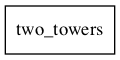

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=96)

In [46]:
learning_rate = 0.05
batch_size = 256
epochs = 2
top_k = 999

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=learning_rate))

In [48]:
train_ds = train.batch(batch_size).cache()

In [49]:
model.fit(train_ds, epochs=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

### Defining the vocabulary for broadcaster

In [13]:
broadcaster_lookup = tf.keras.layers.experimental.preprocessing.StringLookup()

In [14]:
broadcaster_lookup.adapt(ratings.map(lambda x: x["broadcaster"]))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [16]:
def get_list(training_data, key):
	return training_data.batch(1_000_000).map(
		lambda x: x[key], num_parallel_calls = tf.data.AUTOTUNE, deterministic = False
	)
def get_unique_list(data):
	return np.unique(np.concatenate(list(data)))

In [17]:
broadcaster_ids = get_list(ratings, "broadcaster")
unique_broadcasters = get_unique_list(broadcaster_ids)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [26]:
broadcaster_title = tf.keras.Input(shape=(None, ), name='broadcaster_name')

model = tf.keras.Sequential([
			tf.keras.layers.Embedding(len(unique_broadcasters) + 1, 32)
		])

In [23]:
model = tf.keras.Sequential([
			tf.keras.layers.Embedding(len(unique_broadcasters) + 1, 32)
		])

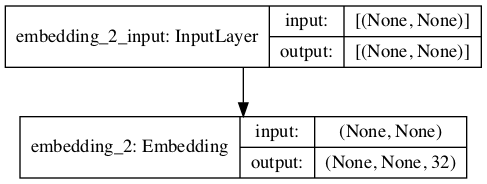

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,dpi=96)

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          2230240   
Total params: 2,230,240
Trainable params: 2,230,240
Non-trainable params: 0
_________________________________________________________________


In [25]:
len(unique_broadcasters) + 1

69695

In [40]:
69695*32

2230240